In [274]:
import requests 
import matplotlib.pyplot as plt
import pandas as pd


In [275]:
# API call
url = 'https://api.cryptonator.com/api/full/'
try:
    base_currency = input ('Enter Your Desired CryptoCurrency')
    target_currency = input ('Enter Your Target_Currency')
    params = (base_currency+'-'+target_currency)
    data_call = requests.get(url+params)
    result = data_call.json()['ticker']['markets']
    
except:
    print ("Sorry, your listed currency isn't available")


Enter Your Desired CryptoCurrencybtc
Enter Your Target_Currencyusd


In [276]:
# DataFrame 
grid = pd.DataFrame(result)
grid

,market,price,volume
0,BitFinex,8186.00000000,74806.652894
1,Bitstamp,8171.82000000,20795.830824
2,Bittrex,8180.36000000,5808.406413
3,C-Cex,9261.00000000,1.445865
4,Cex.io,8300.50000000,1996.717407
5,Exmo,8771.00000000,1579.857802
6,Hitbtc,8656.75000000,6261.260000
7,Kraken,8130.30000000,15453.120992
8,Livecoin,8414.07017000,1452.164922
9,Poloniex,8218.70000102,5583.471504


In [277]:
#Finding Best Possible Buying and Selling Price considering exchange should have good volume transfer e.g: 1000+
filter_data=grid[grid['volume'] > 1000]

proposed_buying_exchange=filter_data.loc[filter_data['price'].idxmin()]
proposed_selling_exchange=filter_data.loc[filter_data['price'].idxmax()]

print (str(proposed_buying_exchange)+ '\n\n' +str(proposed_selling_exchange))

market           Kraken
price     8130.30000000
volume          15453.1
Name: 7, dtype: object

market             Exmo
price     8771.00000000
volume          1579.86
Name: 5, dtype: object


In [278]:
profit = 0
profit = float(proposed_selling_exchange['price'])-float(proposed_buying_exchange['price'])
round(profit)

641

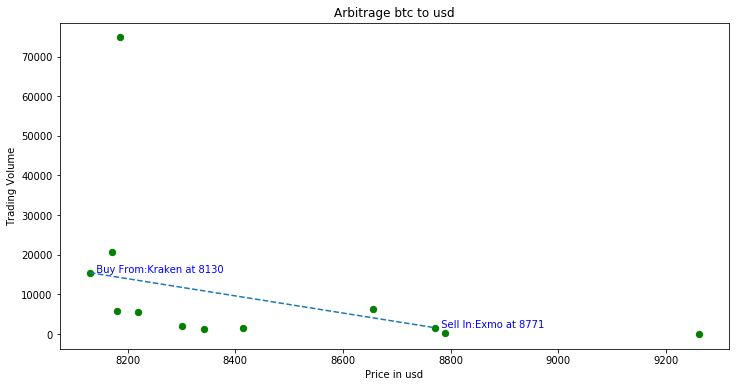

In [279]:
fig = plt.figure(figsize=(12,6))
chart = fig.add_subplot(111)
chart.scatter(grid['price'],grid['volume'],c = 'green', s= 40)
chart.set_title('Arbitrage '+ base_currency + ' to ' + target_currency)
chart.set_ylabel('Trading Volume')
chart.set_xlabel('Price in '+ target_currency)
chart.annotate('  Buy From:'+proposed_buying_exchange['market']+ ' at '+ str(round(float(proposed_buying_exchange['price']))), xy=(proposed_buying_exchange['price'],proposed_buying_exchange['volume']),color='blue')               
chart.annotate('  Sell In:'+proposed_selling_exchange['market']+ ' at '+ str(round(float(proposed_selling_exchange['price']))), xy=(proposed_selling_exchange['price'],proposed_selling_exchange['volume']),color='blue')
plt.plot((proposed_buying_exchange['price'],proposed_selling_exchange['price']),(proposed_buying_exchange['volume'],proposed_selling_exchange['volume']),linestyle = 'dashed')               
plt.show()